## 範例重點
### 學習在模型開始前檢查各個環節
1. 是否有 GPU 資源
2. 將前處理轉為函式，統一處理訓練、驗證與測試集
3. 將超參數變數化，易於重複使用函式、模型等

In [1]:
## 確認硬體資源 (如果你是在 Linux, 若是在 Windows, 請參考 https://blog.csdn.net/idwtwt/article/details/78017565)
!nvidia-smi

/bin/sh: nvidia-smi: command not found


In [6]:
import os
import keras
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

# 本範例不需使用 GPU, 將 GPU 設定為 "無"
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [7]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [8]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [9]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [10]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [11]:
model = build_mlp(input_shape=x_train.shape[1:])
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [12]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 100
BATCH_SIZE = 256

In [13]:
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [14]:
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Instructions for updating:
Use tf.cast instead.
Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 55s 1ms/step - loss: 1.9452 - acc: 0.2962 - val_loss: 1.7378 - val_acc: 0.3853
Epoch 2/100
50000/50000 [==============================] - 43s 860us/step - loss: 1.7076 - acc: 0.3907 - val_loss: 1.6624 - val_acc: 0.4036
Epoch 3/100
50000/50000 [==============================] - 39s 779us/step - loss: 1.6252 - acc: 0.4203 - val_loss: 1.5852 - val_acc: 0.4325
Epoch 4/100
50000/50000 [==============================] - 43s 857us/step - loss: 1.5596 - acc: 0.4443 - val_loss: 1.5514 - val_acc: 0.4458
Epoch 5/100
50000/50000 [==============================] - 41s 819us/step - loss: 1.5137 - acc: 0.4601 - val_loss: 1.5265 - val_acc: 0.4499
Epoch 6/100
50000/50000 [==============================] - 41s 829us/step - loss: 1.4673 - acc: 0.4762 - val_loss: 1.4670 - val_acc: 0.4803
Epoch 7/100
50000/50000 [==============================] - 42s 8

50000/50000 [==============================] - 42s 835us/step - loss: 0.5699 - acc: 0.7957 - val_loss: 1.9328 - val_acc: 0.5028
Epoch 58/100
50000/50000 [==============================] - 42s 834us/step - loss: 0.5564 - acc: 0.8025 - val_loss: 1.9350 - val_acc: 0.5125
Epoch 59/100
50000/50000 [==============================] - 42s 848us/step - loss: 0.5416 - acc: 0.8057 - val_loss: 2.0695 - val_acc: 0.5074
Epoch 60/100
50000/50000 [==============================] - 42s 838us/step - loss: 0.5510 - acc: 0.8022 - val_loss: 2.0386 - val_acc: 0.5001
Epoch 61/100
50000/50000 [==============================] - 42s 837us/step - loss: 0.5284 - acc: 0.8113 - val_loss: 2.0366 - val_acc: 0.5106
Epoch 62/100
50000/50000 [==============================] - 41s 817us/step - loss: 0.5057 - acc: 0.8192 - val_loss: 2.1211 - val_acc: 0.5100
Epoch 63/100
50000/50000 [==============================] - 42s 835us/step - loss: 0.5108 - acc: 0.8171 - val_loss: 2.1368 - val_acc: 0.5041
Epoch 64/100
50000/50000 [

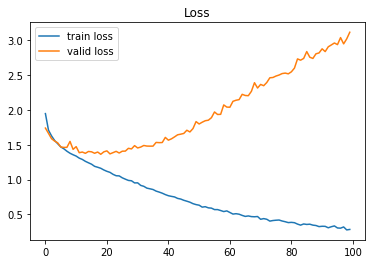

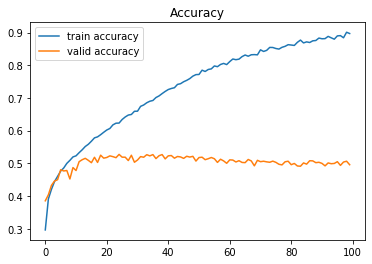

In [16]:
# 訓練模型並檢視驗證集的結果
import matplotlib.pyplot as plt

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

## Work
1. 請嘗試將 preproc_x 替換成以每筆資料的 min/max 進行標準化至 -1 ~ 1 間，再進行訓練
2. 請嘗試將 mlp 疊更深 (e.g 5~10 層)，進行訓練後觀察 learning curve 的走勢
3. (optional) 請改用 GPU 進行訓練 (如果你有 GPU 的話)，比較使用 CPU 與 GPU 的訓練速度